In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib. pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
train_dataset = datasets.MNIST(
    root='./mnist',   # Folder to save the dataset
    train=True,       # Training set
    download=True     # Download from the internet
)

In [3]:
test_dataset = datasets.MNIST(
    root='./mnist',
    train=False,     # Test set
    download=True
)

In [4]:
# Get the first image and label from the training dataset
image, label = train_dataset[0]

print(f"Label of the first image: {label}")


Label of the first image: 5


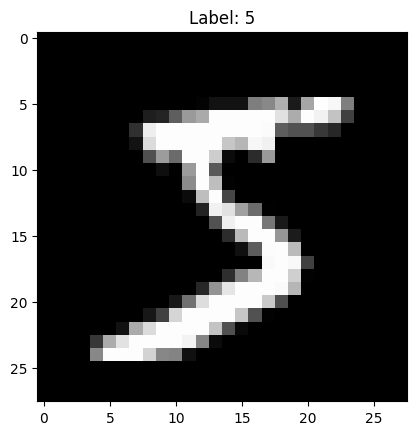

In [5]:
plt.imshow(image, cmap='gray')  # MNIST is grayscale
plt.title(f"Label: {label}")
plt.show()

In [6]:
train_dataset.transform = transforms.ToTensor()     # transforming dataset to tensor
test_dataset.transform = transforms.ToTensor()

In [7]:
image, label = train_dataset[0]
print(f"Tensor shape: {image.shape}")  # torch.Size([1, 28, 28])
print(f"Label: {label}")


Tensor shape: torch.Size([1, 28, 28])
Label: 5


In [8]:
image.squeeze().numpy()


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
# Training DataLoader               # prepare dataset to train
train_loader = DataLoader(
    dataset=train_dataset,   # your tensor dataset
    batch_size=64,           # number of samples per batch
    shuffle=True             # shuffle for training
)

# Test DataLoader
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False            # no need to shuffle test data
)


In [10]:
for images, labels in train_loader:
    print(labels)           # Here, labels will be a tensor of class indices (integers)
    break


tensor([8, 0, 8, 9, 8, 6, 8, 6, 5, 9, 4, 9, 3, 5, 8, 1, 8, 4, 7, 2, 4, 4, 7, 4,
        4, 5, 8, 7, 9, 8, 7, 0, 5, 2, 4, 9, 4, 2, 9, 0, 2, 8, 6, 9, 2, 8, 9, 5,
        2, 3, 1, 4, 8, 8, 8, 9, 2, 9, 4, 2, 4, 3, 8, 0])


In [ ]:
model = nn.Sequential(
    nn.Flatten(),                               # Flatten the input (28x28 → 784)
    nn.Linear(784, 128),
    nn.ReLU(),                                  # activation function to apply nonlinearity
    nn.Linear(128, 10)
)

loss_fn = nn.CrossEntropyLoss()                     # Softmax is automatically applied internally to the raw logits
optimiser = optim.SGD(model.parameters(), lr=0.01)  # parameters are weight and bias

epochs = 5
losses = []

for epoch in range(epochs):
    epoch_loss = 0                              # Track loss for each epoch

    for images, labels in train_loader:

        outputs = model(images)                 # outputs is [64, 10] matrix or 10 logits for every 64 sample, labels is [64] array

        loss = loss_fn(outputs, labels)         # CrossEntropyLoss: softmax applied internally to convert logits to probabilities (sum is 1) for all classes,
                                                # but only the probability corresponding to the true label is used to compute per-sample loss,
                                                # because torch does not use one hot encoded label,
                                                # instead internally reshapes cross entropy as ​​​l=-log(probabilities[label]), 
                                                # returns same scalar valuse as original softmax l=sum(-one_hot _label[i]*log(probabilities[i]),
                                                # because in one_hot_label[i]=0 for all i!=label, and 1 for true label, and -1*log()=-log()
                                                # `loss` is average of losses of batch (64 samples) in one iteration
        
        optimiser.zero_grad()                   # clear gradients in previous iteration
        loss.backward()                         # there model uses loss of every sample of batch (64 samples) to compute gradients
        optimiser.step()                        # then 64 gradients are averaged to get updated weight for current iteration (batch)
        

        epoch_loss += loss.item()  # Accumulate the loss for one epoch

    # Store the loss for each epoch
    losses.append(epoch_loss / len(train_loader))

    # Print epoch loss
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}')

Epoch 1/5, Loss: 1.2160
Epoch 2/5, Loss: 0.4931
Epoch 3/5, Loss: 0.3937
Epoch 4/5, Loss: 0.3536
Epoch 5/5, Loss: 0.3298


In [12]:
losses

[1.2159521854889672,
 0.49305977051192,
 0.39368215765653136,
 0.3536184220743586,
 0.3298200769131499]

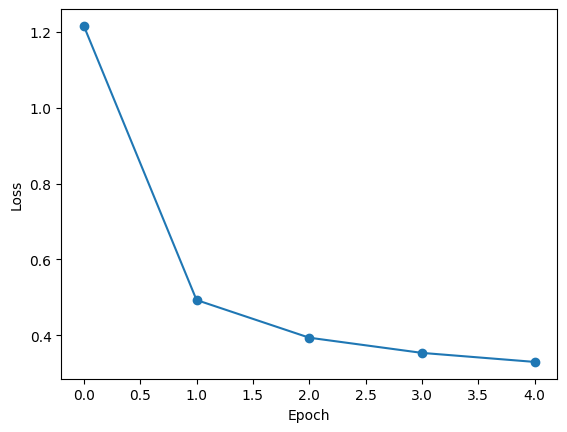

In [13]:
plt.plot(losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [14]:
correct = 0
total = 0

for images, labels in test_loader:
    outputs = model(images)                         # [64, 10] logits
    predicted = outputs.argmax(dim=1)               # take index of max logit of each sample(row) → predicted class
    correct += (predicted == labels).sum()          # count correct predictions
    total += labels.size(0)

print(f'{correct}/{total}')

9149/10000


In [15]:
test_loss = 0

for images, labels in test_loader:
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    test_loss += loss.item()

test_loss / len(test_loader)


0.30316696143976063